# <center>Introduction on Using Python to access and analyse GeoNet's Acoustic Data

This tutorial will demonstrate how to get seismic-acoustic waveform data to study volcanic events. By the end of this notebook the user will have make a graph like the one below. <img src="accoustic.png">

## Table of Contents

### 1. Introduction
### 2. Set up
### 3. Get the Location of all  Stations with Seismic-acoustic Data
### 4. Look more at one Station
### 5. Get Waveform Data
#####  &nbsp; 5. 1 Trim Waveform data
#####  &nbsp; 5. 2 Save Waveform Data
### 6. Getting Near real-time waveform data

##  &nbsp; 1. Introduction

In this tutorial the user will learn how to use Python to be able to access the data recorded by GeoNet's network of seismic-acoustic sensors’. Then we will look at some ways we can interact with this data in Python. 

If not using binder the user will need to install the packages obspy (https://github.com/obspy/obspy/wiki) and basemap (https://matplotlib.org/basemap/) useing `pip install (package name)` in the terminal / command prompt / Anaconda prompt

This tutorial assumes that the user have basic knowledge of Python.
We will be using a package called obspy (https://github.com/obspy/obspy/wiki)

###### About GeoNet's seismic-acoustic

GeoNet collects seismic-acoustic data around some of New Zealands’ volcanos. This data is collected at 2 sample rates 100Hz and 1Hz. Each channel of data has a 3-letter channel code that tells you what data is on that channel. All seismic-acoustic sensors have a channel code in the form (H/L) D F
<ul>
<li>The first letter is the sample rate. H = 100Hz and L = 1Hz, 
<li>The second letter defines that is a seismic-acoustic sensor 
<li>The third letter indicates this sensor is a single component vertical sensor 
</ul>  

For a full list see https://www.geonet.org.nz/data/supplementary/channels

Note that in operational situation seismic-acoustic data is consider together with weak motion data. For how to get this data in python go to GeoNet_FDSN_demo_dataselect https://github.com/GeoNet/data-tutorials/blob/master/Seismic_Data/Python/GeoNet_FDSN_demo_dataselect.ipynb

## &nbsp; 2. Set up

###### Import obspy

In [1]:
from obspy.clients.fdsn import Client as FDSNClient # Import a module to retrieve data from FDSN Web Services 
from obspy import UTCDateTime # Import a module to manage time series format and rename as UTCDateTime
from obspy import read_inventory # Imports module to read stattion data

For more information on obspy run `help(obspy)`

In [2]:
#import matplotlib
#matplotlib.use('TkAgg')

`matplotlib` is the package used to make plots in python. 
The line `matplotlib.use('TkAgg')` will make all plots open in an interactive window, known as a Tkinter window, so you can zoom in on plots and save them as a png. (The `Tk` is to make it in a Tkinter window and the `Agg` stands for the Anti-Grain Geometry rendering engine that is used to make high-quality images). 
This is a needed line of code in Python 2 to stop plotting errors, but is not need in Python 3.

###### Set up URL's

In [3]:
client = FDSNClient("GEONET")
client_nrt = FDSNClient('https://service-nrt.geonet.org.nz')

GeoNet has two FDSN services <br>
For waveform data
an archive service holds verified data starting 7 days after collection, 
and a near real-time service holds data that could be incomplete from the last 8 days<br>

## &nbsp;  3. Get the Location of all  Stations with Seismic-acoustic Data

###### Set the start and end time of the data you want to select

In [4]:
starttime = UTCDateTime("2012-08-05") # initial time
endtime = UTCDateTime("2012-08-07") # end time 

Note that time must be in UTC (Universal Time Coordinated) which is 13 or 12 hours behind NZT (New Zealand Time) (depending on daylight savings time).

###### Get all stations that have seismic-acoustic data

In [5]:
Inventory = client.get_stations(starttime = starttime,endtime = endtime, channel="?D?" )

`get_stations` gets all stations that where running at some point between `starttime` and `endtime` and hold to any other conditions put in the `()`such as channel, station, latitude and longitude with a maxradius<br>
All seismic-acoustic sensors have a channel code in the form (H/L) D F <br>
The `?` is a wild card that will look for data with a channel code in the format (any letter)D(any letter) <br>
Therefor the code above finds all stations which have a channel code in the format (any letter)D(any letter)<br> 

###### Print all stations that have seismic-acoustic data

In [6]:
Inventory

Inventory created at 2019-02-01T02:17:55.000000Z
	Created by: Delta
		    
	Sending institution: GeoNet (WEL(GNS_Test))
	Contains:
		Networks (1):
			NZ
		Stations (19):
			NZ.BCKZ (Boat Cove)
			NZ.COVZ (Chateau Observatory)
			NZ.FWVZ (Far West)
			NZ.GBIH (Great Barrier Island Hydrophone Array)
			NZ.GNSW (GNS Wairakei Seismo Lab)
			NZ.IVVZ (Iwikau Village)
			NZ.KHEZ (Kahui Hut)
			NZ.KRVZ (Karewarewa)
			NZ.MAVZ (Matarangi)
			NZ.NEZ (North Egmont)
			NZ.NGZ (Ngauruhoe)
			NZ.OTVZ (Oturere)
			NZ.PREZ (Palmer Road)
			NZ.TOVZ (Turoa Road End)
			NZ.TRVZ (Turoa)
			NZ.WHVZ (Whangaehu Hut)
			NZ.WIZ (White Island)
			NZ.WNVZ (Wahianoa)
			NZ.WTVZ (West Tongariro)
		Channels (0):


###### Plot all stations that have seismic-acoustic data

In [7]:
Inventory.plot(projection="local") 

`projection="local"` makes a plot that is a map and has all the data points in it. More information can be found at https://matplotlib.org/basemap/

### &nbsp;  4. Look more at one Station

In this section we will learn how to get more information on a station including the instrument response information.

###### Get more data on the Iwikau Village station

In [8]:
site = client.get_stations(starttime = starttime,endtime = endtime,station="IVVZ", level="response" )

Having seen the Iwikau Village station on the map and its station code, I can get more data about this station. <br>
We can use the parameter `level` to pick the "level" of detail in data we want. The “level” of the data is about how much on each station you get. `level="response"` is the  most complete "level" of data we can get from `get_stations` and includes the instrument response data.<br>
`station="IVVZ"` say that the code get data for the station with the station code IVVZ<br>

###### Print Iwikau Village station metadata

In [9]:
channels = site[0][0]
print(channels)

Station IVVZ (Iwikau Village)
	Station Code: IVVZ
	Channel Count: 2/2 (Selected/Total)
	2009-01-29T00:00:00.000000Z - 
	Access: open 
	Latitude: -39.24, Longitude: 175.56, Elevation: 1663.0 m
	Available Channels:
		IVVZ.30.HDF, IVVZ.30.LDF


Remember the 3 letter channel code.
All seismic-acoustic sensors have a channel code in the form (H/L) D F
<ul>
<li>The first letter is the sample rate. H = 100Hz and L = 1Hz, 
<li>The second letter defines that is a seismic-acoustic sensor 
<li>The third letter indicates this sensor is a single component vertical sensor 
</ul>    

Note that `site [0][0]` says get the first network's first station.

###### Print Iwikau Village Channel metadata including instrument response data

In [10]:
print(channels[0])
print(channels[0].response)
print(channels[1])
print(channels[1].response)

Channel 'LDF', Location '30' 
	Time range: 2009-01-29T00:00:00.000000Z - --
	Latitude: -39.24, Longitude: 175.56, Elevation: 1663.0 m, Local Depth: 0.0 m
	Azimuth: 0.00 degrees from north, clockwise
	Dip: 0.00 degrees down from horizontal
	Channel types: CONTINUOUS, WEATHER
	Sampling Rate: 1.00 Hz
	Sensor (Description): Barometer (Setra 270)
	Response information available
Channel Response
	From hPa () to count ()
	Overall Sensitivity: 4194.3 defined at 0.100 Hz
	3 stages:
		Stage 1: PolynomialResponseStage from hPa to V, gain: 0.01
		Stage 2: CoefficientsTypeResponseStage from V to count, gain: 419430
		Stage 3: FIRResponseStage from count to count, gain: 1
Channel 'HDF', Location '30' 
	Time range: 2009-01-29T00:00:00.000000Z - --
	Latitude: -39.24, Longitude: 175.56, Elevation: 1663.0 m, Local Depth: 0.0 m
	Azimuth: 0.00 degrees from north, clockwise
	Dip: 0.00 degrees down from horizontal
	Channel types: CONTINUOUS, WEATHER
	Sampling Rate: 100.00 Hz
	Sensor (Description): Barometer

## &nbsp;  5. Get Waveform Data

In [26]:
IVVZ= client.get_waveforms('NZ',"IVVZ", "*", "?DF", starttime,endtime)

The parameters are in the order network, station, location, channel, starttime, and endtime.
The ? is a wildcard character for only a single character, so we will get data with channel codes HDF and LDF.
The * is a wildcard character that says it will look for data with any location code.

###### Remove instrument sensitivity

In [28]:
IVVZ.remove_sensitivity(inventory=site)

2 Trace(s) in Stream:
NZ.IVVZ.30.HDF | 2012-08-04T23:59:55.578391Z - 2012-08-07T00:00:01.498391Z | 100.0 Hz, 17280593 samples
NZ.IVVZ.30.LDF | 2012-08-04T23:53:46.069517Z - 2012-08-07T00:03:21.069517Z | 1.0 Hz, 173376 samples

`remove_sensitivity` effectively converts from counts(the output of the digitiser) into hPa (hectopascals). This does not remove all the instrument response as this changes with frequency, but it removes it based on the line in the channel response information “Overall Sensitivity: X defined at Y Hz”. 

###### Check basic metadata from miniSEED header

In [13]:
print(IVVZ[0].stats, "\n")
print(IVVZ[1].stats)

               network: NZ
               station: IVVZ
              location: 30
               channel: HDF
             starttime: 2012-08-04T23:59:55.578391Z
               endtime: 2012-08-07T00:00:01.498391Z
         sampling_rate: 100.0
                 delta: 0.01
                  npts: 17280593
                 calib: 1.0
_fdsnws_dataselect_url: http://service.geonet.org.nz/fdsnws/dataselect/1/query
               _format: MSEED
                 mseed: AttribDict({'dataquality': 'D', 'number_of_records': 37568, 'encoding': 'STEIM2', 'byteorder': '>', 'record_length': 512, 'filesize': 19385344})
            processing: ['ObsPy 1.1.0: remove_sensitivity(inventory=<obspy.core.inventory.inventory.Inventory object at 0x000001DEA36D5EB8>)'] 

               network: NZ
               station: IVVZ
              location: 30
               channel: LDF
             starttime: 2012-08-04T23:53:46.069517Z
               endtime: 2012-08-07T00:03:21.069517Z
         sampling_rate: 1.0

###### Plot this data

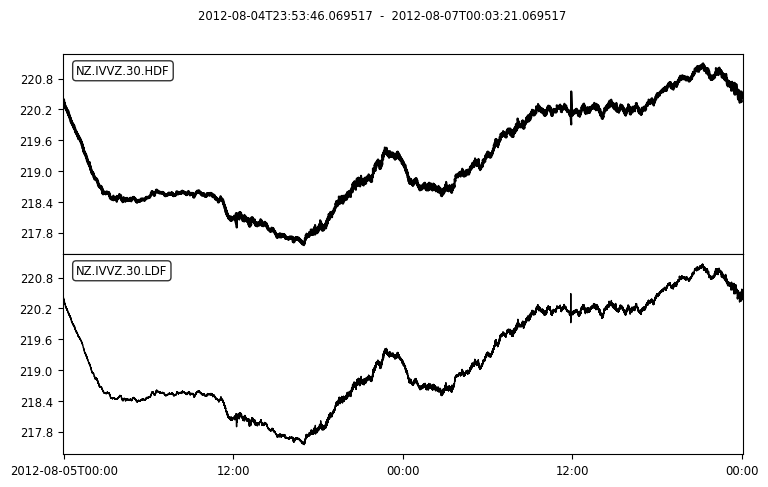

In [29]:
IVVZ.plot()

These graphs show time vs hPa. The top graph in the show the data at 100Hz (HDF) while the bottom one shows it at 1Hz (LDF)

##   &nbsp; 5. 1 Trim Waveform data

In this example there is a point of interest at about midday on the 2nd day, so we want to “zoom in” on this point.

###### Set the start and end time of the data you want to select

In [15]:
start = UTCDateTime("2012-08-06T11:50") # initial time
end = UTCDateTime("2012-08-06T12:10") # end time 

###### Trim data

In [16]:
IVVZ[0].trim(start, end)

NZ.IVVZ.30.HDF | 2012-08-06T11:49:59.998391Z - 2012-08-06T12:09:59.998391Z | 100.0 Hz, 120001 samples

`trim`"zoom in" on part of the data that you already have. Here, we are zoom in on the 100Hz data for between 11.50 and 12.10.

###### Plot data

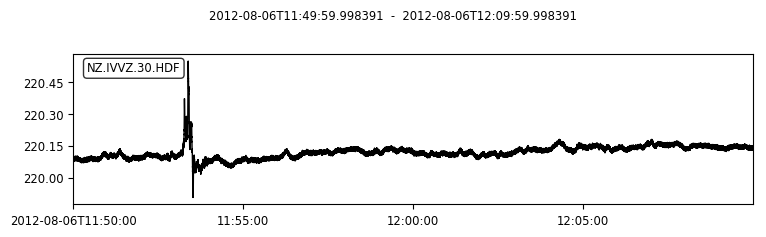

In [17]:
IVVZ[0].plot()

###### Plot spectrogram

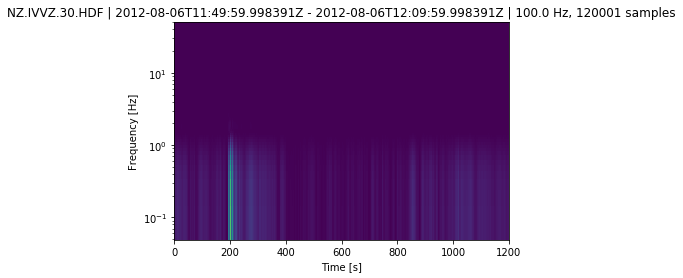

In [18]:
IVVZ[0].spectrogram(log=True)

##  &nbsp; 5. 2 Save Waveform Data

In [19]:
IVVZ[0].write('IVVZ.csv', format='TSPAIR')

Files are save into the same folder that this notebook is in. <br>
Files are saved in .csv format to be able to opened by most spreadsheet software.<br>
`format = 'TSPAIR'` makes the data into a two column list of time and the sample values <br>
For more information on this you can go to http://ds.iris.edu/ds/nodes/dmc/data/formats/simple-ascii/

## &nbsp;  6. Getting Near real-time waveform data

###### Set new start and end time of the data you want to look at

In [20]:
t1 = UTCDateTime.now()-777600 #9 days ago
t2 = UTCDateTime.now()-518400 #6 days ago

Note that time must be in UTC (Universal Time Coordinated) which is 13 or 12 hours behind NZT (New Zealand Time) (depending on daylight savings time).
There are online converters if needed.
`UTCDateTime.now()-777600` say take the time the computer says it is now, convert it to UTC and then takes away 777,600 seconds from it, which is $60$(minutes)$*60$(seconds)$*24$(hours)$*9$(days). 

###### Try both near real-time and  archive service to get waveform data

In [21]:
try:
    stnrt = client_nrt.get_waveforms('NZ',"IVVZ", "30", "LD?", t1 , t2)#try near real-time
except:
    print('nrt client not successful')
    
try:
    starc = client.get_waveforms('NZ',"IVVZ", "30", "LD?", t1 , t2)#try achive
except:
    print('arc client not successful')

Remember that GeoNet has two FDSN services <br>
An archive service holds verified data starting 7 days after collection<br>
A near real-time service holds data that could be incomplete from the last 8 days<br>
As the time between 9 and 6 days overlaps this time the code tries to get the data from both services<br>

###### Merge this data

In [22]:
st = stnrt #rename near real-time data 
st += starc #add archive data to this 
st.merge(fill_value = 'interpolate') #merge this data

1 Trace(s) in Stream:
NZ.IVVZ.30.LDF | 2019-01-25T20:26:21.069539Z - 2019-01-28T20:35:02.069539Z | 1.0 Hz, 259722 samples

If data is not merged then it is harder to plot and manipulate. 
`st += starc` is the same as `st = st + starc`. 
`fill_value = 'interpolate'` says that if there is a missing value then it will be filled with a "best guess" data point by looking at the two data points next to it. 

###### Remove instrument sensitivity

In [23]:
st.remove_sensitivity(inventory=site)

1 Trace(s) in Stream:
NZ.IVVZ.30.LDF | 2019-01-25T20:26:21.069539Z - 2019-01-28T20:35:02.069539Z | 1.0 Hz, 259722 samples

###### Plot this data

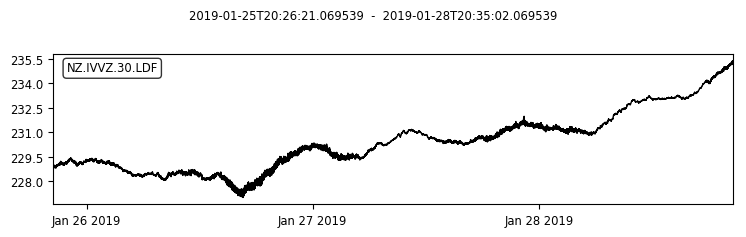

In [31]:
st.plot()

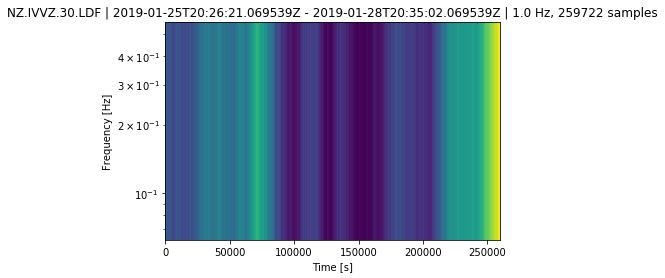

[None]

In [25]:
st.spectrogram(log=True,samp_rate=1,wlen=1)

## Useful links

<ul>
    <li>This notebook uses Python https://www.python.org/
    <li>This notebook also uses obspy https://github.com/obspy/obspy/wiki
    <li>For how to get weak motion data go to https://github.com/GeoNet/data-tutorials/blob/master/Seismic_Data/Python/GeoNet_FDSN_demo_dataselect.ipynb
    <li>More tutorials on volcano data can be found at https://github.com/GeoNet/data-tutorials/blob/master/Volcano_Data   
    <li>More tutorials on seimic data can be found at https://github.com/GeoNet/data-tutorials/blob/master/Seismic_Data
</ul>